# 05a_split_by_sex

docker run --rm -d --name scanpy -p 8883:8888 -e JUPYTER_ENABLE_LAB=YES -v /Users/efast/Documents/:/home/jovyan/work r_scanpy:vs5


In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)


### A) split LTs

In [3]:
adata = sc.read('./sc_objects/LT_preprocessed.h5ad', cache = True)

In [4]:
adata

AnnData object with n_obs × n_vars = 15355 × 14408 
    obs: 'sample', 'n_counts', 'log_counts', 'n_genes', 'percent_mito', 'Female', 'Female_cat', 'Female_str', 'sex_sample', 'batch', 'rXist', 'leiden', 'umap_density_sample'
    var: 'gene_ids', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'diffmap_evals', 'draw_graph', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'sex_sample_colors', 'umap', 'umap_density_sample_params'
    obsm: 'X_diffmap', 'X_draw_graph_fr', 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'

#### Check the previous clustering (Leiden 6 clusters 25 KNN, 0.4 resolution)

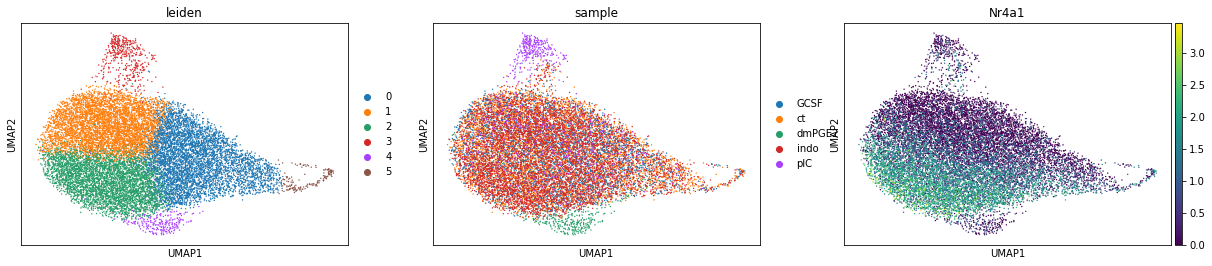

In [5]:
sc.pl.umap(adata, color=['leiden','sample','Nr4a1'])

### Select subtypes of female and male

In [6]:
adata.obs.head()

,sample,n_counts,log_counts,n_genes,percent_mito,Female,Female_cat,Female_str,sex_sample,batch,rXist,leiden,umap_density_sample
AAACCCACACAGAGCA,ct,7698.0,8.948846,2664,0.049227,False,False,false,ct_false,batch1,0.078504,2,0.769843
AAACCCAGTATCGTGT,ct,8031.0,8.991189,2539,0.054656,False,False,false,ct_false,batch1,0.078504,1,0.978590
AAACCCAGTCTGTCAA,ct,9978.0,9.208138,3203,0.050210,True,True,true,ct_true,batch1,3.259153,0,0.493924
AAACCCAGTGAACTAA,ct,8042.0,8.992682,2779,0.061288,True,True,true,ct_true,batch1,3.019387,1,0.920127
AAACCCATCCAATCTT,ct,17477.0,9.769098,4703,0.052159,True,True,true,ct_true,batch1,0.525301,2,0.931675


In [7]:
adata

AnnData object with n_obs × n_vars = 15355 × 14408 
    obs: 'sample', 'n_counts', 'log_counts', 'n_genes', 'percent_mito', 'Female', 'Female_cat', 'Female_str', 'sex_sample', 'batch', 'rXist', 'leiden', 'umap_density_sample'
    var: 'gene_ids', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'diffmap_evals', 'draw_graph', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'sex_sample_colors', 'umap', 'umap_density_sample_params'
    obsm: 'X_diffmap', 'X_draw_graph_fr', 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'

In [8]:
# select female and male cells

adata_female = adata[adata.obs['Female']==True].copy()
adata_male = adata[adata.obs['Female']==False].copy()

print(adata_female)
print(adata_male)

AnnData object with n_obs × n_vars = 8280 × 14408 
    obs: 'sample', 'n_counts', 'log_counts', 'n_genes', 'percent_mito', 'Female', 'Female_cat', 'Female_str', 'sex_sample', 'batch', 'rXist', 'leiden', 'umap_density_sample'
    var: 'gene_ids', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'diffmap_evals', 'draw_graph', 'leiden', 'neighbors', 'pca', 'sample_colors', 'sex_sample_colors', 'umap', 'umap_density_sample_params'
    obsm: 'X_diffmap', 'X_draw_graph_fr', 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
AnnData object with n_obs × n_vars = 7075 × 14408 
    obs: 'sample', 'n_counts', 'log_counts', 'n_genes', 'percent_mito', 'Female', 'Female_cat', 'Female_str', 'sex_sample', 'batch', 'rXist', 'leiden', 'umap_density_sample'
    var: 'gene_ids', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'diffmap_evals', 'draw_graph', 'leiden', 'neighbors', 'pca', 'sample_colors', 'sex_sample_colors', 'umap', 'umap_density_s

In [9]:
#Write to file
adata_female.write('./sc_objects/LT_female.h5ad')
adata_male.write('./sc_objects/LT_male.h5ad')

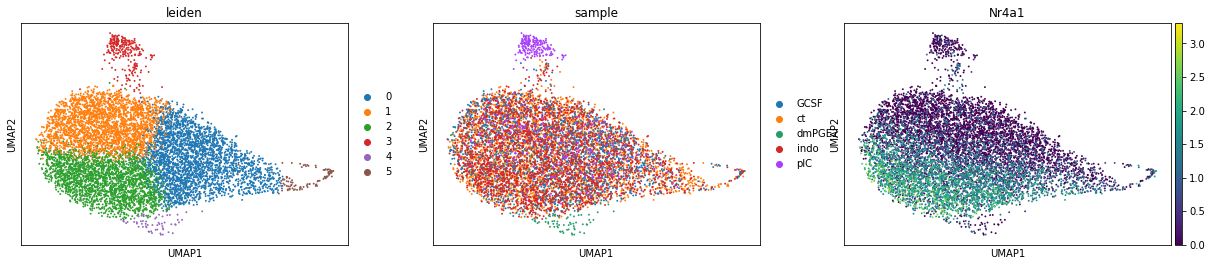

In [10]:
sc.pl.umap(adata_female, color=['leiden','sample','Nr4a1'])

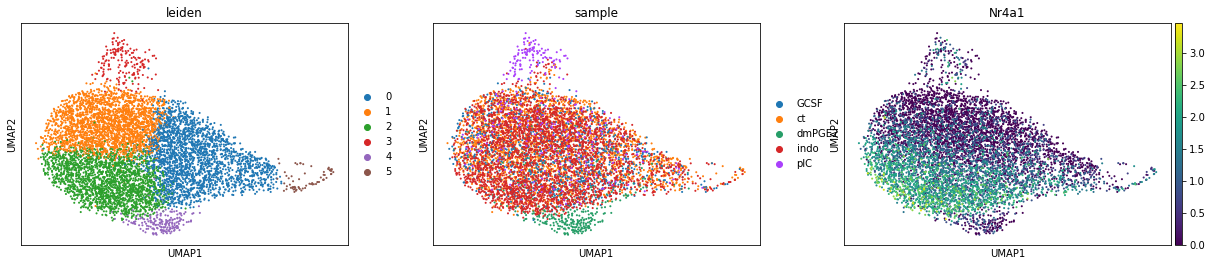

In [11]:
sc.pl.umap(adata_male, color=['leiden','sample','Nr4a1'])

### 2) split MPPs

In [12]:
adata = None
adata_female = None
adata_male = None

In [13]:
adata = sc.read('./sc_objects/MPP_preprocessed.h5ad', cache = True)

In [14]:
adata

AnnData object with n_obs × n_vars = 8191 × 13827 
    obs: 'assignment', 'batch', 'counts', 'demux_type', 'hto_type', 'rna_type', 'sample', 'select_cells', 'n_counts', 'log_counts', 'n_genes', 'percent_mito', 'Female', 'Female_cat', 'Female_str', 'sex_sample', 'rXist', 'leiden', 'umap_density_sample', 'umap_density_assignment'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'assignment_colors', 'diffmap_evals', 'draw_graph', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'sex_sample_colors', 'umap', 'umap_density_assignment_params', 'umap_density_sample_params'
    obsm: 'X_diffmap', 'X_draw_graph_fr', 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'

#### Check the previous clustering (Leiden 8 clusters 30 KNN, 0.7 resolution)

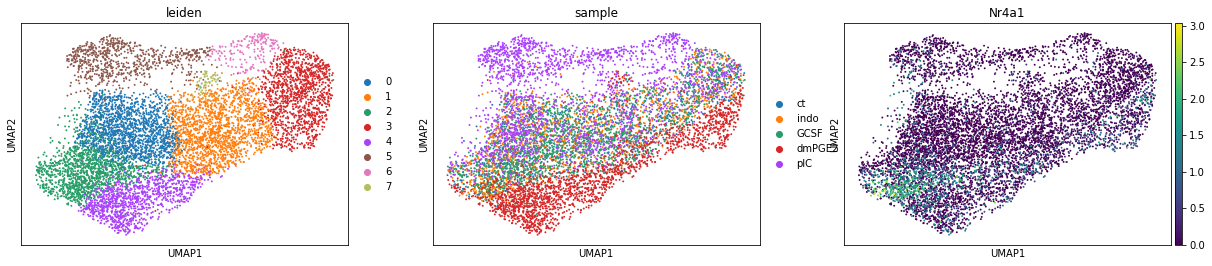

In [15]:
sc.pl.umap(adata, color=['leiden','sample','Nr4a1'])

### Select subtypes of female and male

In [16]:
adata.obs.head()

,assignment,batch,counts,demux_type,hto_type,rna_type,sample,select_cells,n_counts,log_counts,n_genes,percent_mito,Female,Female_cat,Female_str,sex_sample,rXist,leiden,umap_density_sample,umap_density_assignment
AAACGAAGTTGGACCC-0,MPP3/4,batch1,902.0,singlet,background,signal,ct,1.0,13508.0,9.511259,3991,0.057805,True,True,true,ct_true,3.158928,1,0.637315,0.847134
AAAGGATCACGCTGAC-0,MPP,batch1,869.0,singlet,background,signal,ct,1.0,18172.0,9.807637,4622,0.049802,True,True,true,ct_true,3.078445,0,0.783623,0.335968
AAAGGATGTAGTCTGT-0,MPP3/4,batch1,694.0,singlet,background,signal,ct,1.0,8688.0,9.070044,3154,0.059602,True,True,true,ct_true,3.206680,0,0.866588,0.514442
AAAGGGCAGCAGCGAT-0,MPP,batch1,848.0,singlet,background,signal,ct,1.0,8510.0,9.049468,2990,0.056965,False,False,false,ct_false,-0.049406,0,0.675819,0.257006
AAAGGTATCTTCGACC-0,MPP3/4,batch1,3446.0,singlet,signal,signal,ct,1.0,15875.0,9.672815,4302,0.046851,True,True,true,ct_true,2.978796,3,0.668953,0.709803


In [17]:
adata

AnnData object with n_obs × n_vars = 8191 × 13827 
    obs: 'assignment', 'batch', 'counts', 'demux_type', 'hto_type', 'rna_type', 'sample', 'select_cells', 'n_counts', 'log_counts', 'n_genes', 'percent_mito', 'Female', 'Female_cat', 'Female_str', 'sex_sample', 'rXist', 'leiden', 'umap_density_sample', 'umap_density_assignment'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'assignment_colors', 'diffmap_evals', 'draw_graph', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'sex_sample_colors', 'umap', 'umap_density_assignment_params', 'umap_density_sample_params'
    obsm: 'X_diffmap', 'X_draw_graph_fr', 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'

In [18]:
# select female and male cells

adata_female = adata[adata.obs['Female']==True].copy()
adata_male = adata[adata.obs['Female']==False].copy()

print(adata_female)
print(adata_male)

AnnData object with n_obs × n_vars = 4381 × 13827 
    obs: 'assignment', 'batch', 'counts', 'demux_type', 'hto_type', 'rna_type', 'sample', 'select_cells', 'n_counts', 'log_counts', 'n_genes', 'percent_mito', 'Female', 'Female_cat', 'Female_str', 'sex_sample', 'rXist', 'leiden', 'umap_density_sample', 'umap_density_assignment'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'assignment_colors', 'diffmap_evals', 'draw_graph', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'sex_sample_colors', 'umap', 'umap_density_assignment_params', 'umap_density_sample_params'
    obsm: 'X_diffmap', 'X_draw_graph_fr', 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
AnnData object with n_obs × n_vars = 3810 × 13827 
    obs: 'assignment', 'batch', 'counts', 'demux_type', 'hto_type', 'rna_type', 'sample', 'select_cells', 'n_counts', 'log_counts', 'n_genes', 'percent_mito', 'Female', 'Female_cat', 'Female_str', 'sex_sam

In [19]:
#Write to file
adata_female.write('./sc_objects/MPP_female.h5ad')
adata_male.write('./sc_objects/MPP_male.h5ad')

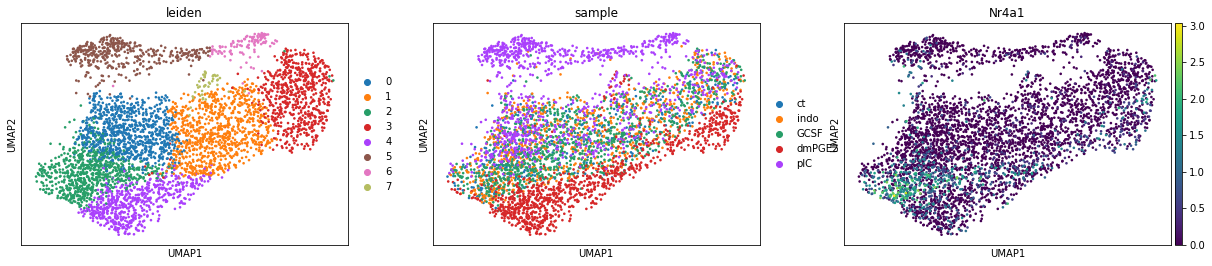

In [20]:
sc.pl.umap(adata_female, color=['leiden','sample','Nr4a1'])

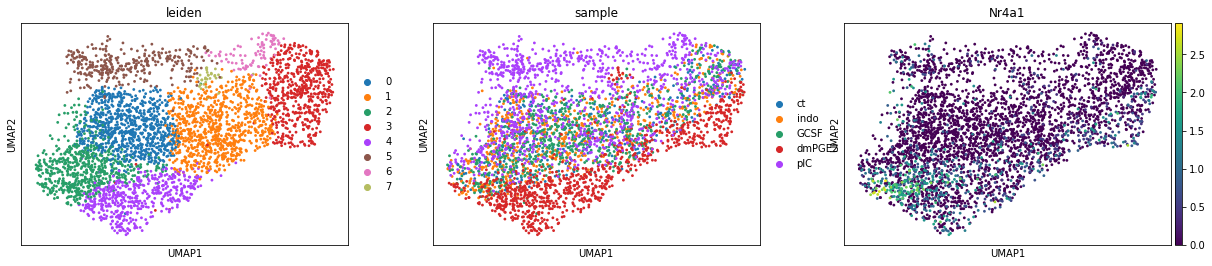

In [21]:
sc.pl.umap(adata_male, color=['leiden','sample','Nr4a1'])

In [22]:
!pip list

Package                Version            
---------------------- -------------------
alembic                1.3.0              
anndata                0.7.1              
anndata2ri             1.0.2              
async-generator        1.10               
attrs                  19.3.0             
backcall               0.1.0              
bleach                 3.1.0              
blinker                1.4                
certifi                2019.11.28         
certipy                0.1.3              
cffi                   1.13.2             
chardet                3.0.4              
conda                  4.7.12             
conda-package-handling 1.6.0              
cryptography           2.8                
cycler                 0.10.0             
decorator              4.4.1              
defusedxml             0.6.0              
entrypoints            0.3                
get-version            2.1                
gprofiler-official     1.0.0              
h5py       

In [24]:
sc.logging.print_versions()
pd.show_versions()

scanpy==1.4.5.1 anndata==0.7.1 umap==0.3.10 numpy==1.17.3 scipy==1.3.0 pandas==0.25.3 scikit-learn==0.22.2.post1 statsmodels==0.10.0 python-igraph==0.7.1 louvain==0.6.1

INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.3.final.0
python-bits      : 64
OS               : Linux
OS-release       : 4.19.76-linuxkit
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : en_US.UTF-8
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 0.25.3
numpy            : 1.17.3
pytz             : 2019.3
dateutil         : 2.8.1
pip              : 19.3.1
setuptools       : 41.6.0.post20191101
Cython           : None
pytest           : 5.3.5
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : None
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 2.10.3
IPython          : 7.